In [1]:
import requests
import re
import json

URL="https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E5%9C%96/%E6%AF%94%E7%89%B9%E5%B9%A3/twd"
resp = requests.get(URL)
resp.text[:200]

'<!DOCTYPE html>\n<html>\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net'

In [3]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(resp.text, 'html.parser')

In [5]:
rate = soup.select('#coin_portfolio_price_chart_btc')
#rate
#print(type(rate[0]))
#print(type(rate))

In [7]:
print(type(rate[0]))
print(type(rate))

<class 'bs4.element.Tag'>
<class 'list'>


In [6]:
rate_clear = soup.select('#coin_portfolio_price_chart_btc')[0].prettify('utf-8').decode('utf-8')
#print(type(rate[0]))  <class 'int'>
#rate1 = rate.decode('utf-8')
#print(type(rate1))  <class 'str'>

In [8]:
m = re.search('<div class="coin_portfolio_price_chart" data-prices="(.*?)"',rate_clear)
# print(m.group(1))
# print(type(m.group(1)))  <class 'str'>
js = json.loads(m.group(1))
js[0:10]

[[1516267770203.7302, 339791.5],
 [1516268382956.36, 340590.48],
 [1516268969919.76, 342750.83],
 [1516269577659.9, 344240.2],
 [1516270183421.13, 340861.72],
 [1516270782907.86, 342804.23],
 [1516271382252.31, 341626.28],
 [1516271943309.37, 337591.15],
 [1516272578447.0999, 340014.49],
 [1516273172282.75, 341754.12]]

In [77]:
import pandas
df = pandas.DataFrame(js)
df.columns = ['Datetime','TWD$']
df['Datetime'] = pandas.to_datetime(df['Datetime'] , unit='ms')
df.head()


,Datetime,TWD$
0,2017-11-19 05:36:17.293010,233819.37
1,2017-11-19 05:45:49.882870,233981.21
2,2017-11-19 05:56:11.176350,234003.36
3,2017-11-19 06:06:24.082760,233842.15
4,2017-11-19 06:16:00.814370,234177.97


In [79]:
df.index=df.Datetime
df.head()

,Datetime,TWD$
Datetime,,
2017-11-19 05:36:17.293010,2017-11-19 05:36:17.293010,233819.37
2017-11-19 05:45:49.882870,2017-11-19 05:45:49.882870,233981.21
2017-11-19 05:56:11.176350,2017-11-19 05:56:11.176350,234003.36
2017-11-19 06:06:24.082760,2017-11-19 06:06:24.082760,233842.15
2017-11-19 06:16:00.814370,2017-11-19 06:16:00.814370,234177.97


In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


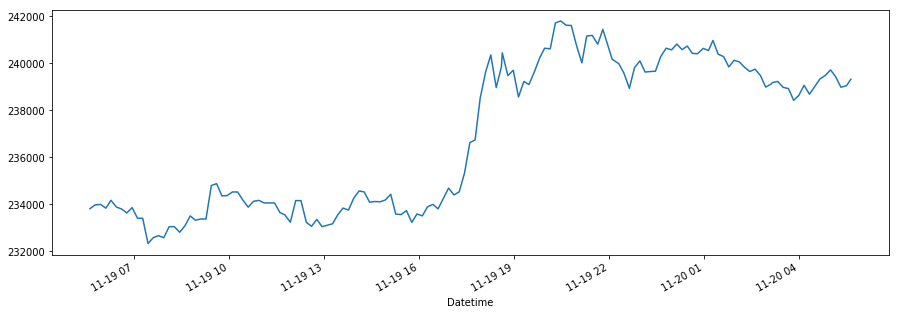

In [92]:
df['TWD$'].plot(kind = 'line', figsize=[15,5])

,Datetime,TWD$
TWD$,,
233819.37,2017-11-19 05:36:17.293010,233819.37
233981.21,2017-11-19 05:45:49.882870,233981.21
234003.36,2017-11-19 05:56:11.176350,234003.36
233842.15,2017-11-19 06:06:24.082760,233842.15
234177.97,2017-11-19 06:16:00.814370,234177.97
233890.49,2017-11-19 06:26:20.691550,233890.49
233807.10,2017-11-19 06:36:13.706980,233807.10
233639.79,2017-11-19 06:46:10.434080,233639.79
233866.09,2017-11-19 06:56:10.307060,233866.09


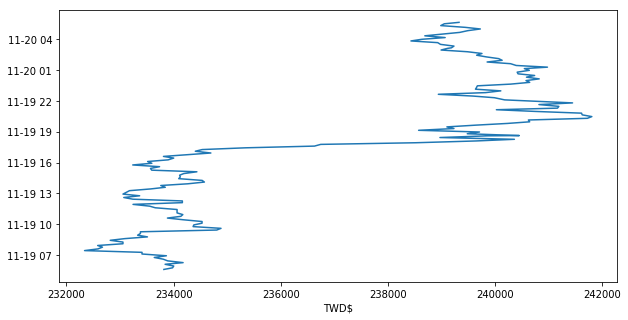

In [98]:
df.index = df['TWD$']
df.head()
df['Datetime'].plot(kind ='line', figsize = [10,5])
df